<a href="https://colab.research.google.com/github/hernansalinas/CursoMetodosComputacionales/blob/main/Material_sesiones/ExamenFinal_2024_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Presentado por Joan Mauricio Yanza Ruiz####


# Evaluación final Métodos computacionales

Profesor: Hernan D. Salinas

Universidad de Antioquia

El examen consta de siete puntos, cada uno con igual valor. Puede utilizar librerías para su solución. La entrega se realiza a través de GitHub. El plazo de entrega es el jueves 8 de agosto a las 11:59 pm. Evite el uso de inteligencia artificial.



En este examen, estudiaremos la caída de un lápiz en posición vertical. El lápiz puede ser modelado como un cuerpo rígido, cuyas ecuaciones de movimiento respecto a su centro de masa pueden ser expresadas de la siguiente manera, de acuerdo con la imagen mostrada en la figura:



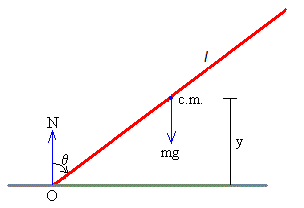


## Ecuaciones de movimiento

### Ecuaciones de movimiento del centro de masa

De acuerdo con la segunda ley de Newton, la ecuación de movimiento a lo largo de la vertical ($y$) puede ser escrita como:

\begin{equation}
m\frac{d^2y}{dt^2} = N - mg
\end{equation}

donde $m$ es la masa de la lápiz, $N$ es la fuerza normal y $g$ es la aceleración de la gravedad. Escribiendo las ecuaciones en términos del ángulo $\theta$, tenemos que:

\begin{equation}
-m\frac{l}{2}\cos \theta \left(\frac{d\theta}{dt} \right)^2 - m\frac{l}{2}\sin \theta \frac{d^2\theta}{dt^2} = N - mg
\end{equation}

### Ecuaciones de rotación del centro de masa

La sumatoria de momentos de fuerza se puede escribir como sigue:

\begin{equation}
I_c\frac{d^2\theta}{dt^2} = N\frac{l}{2} \sin \theta
\end{equation}

donde $I_c = \frac{1}{12}ml^2$ es el momento de inercia de una lápiz de masa $m$ y longitud $l$ respecto a un eje perpendicular a la lápiz en su centro de masa.

Reemplazando el valor de la normal en la ecuación anterior, obtenemos que la ecuación de movimiento para la posición angular está dada por:

\begin{equation}
\frac{d^2 \theta}{dt^2} = \left( \frac{\frac{2g}{l} - \left(\frac{d\theta}{dt}\right)^2\cos \theta }{\frac{1}{3} + \sin^2 \theta} \right)\sin \theta
\end{equation}

Podemos resolver la ecuación anterior si conocemos las condiciones iniciales: $\theta = \theta_0$ en $t = 0$ y $\frac{d\theta}{dt} = \omega_0 = 0$.

Su tarea en este examen será modelar el movimiento de caída del lápiz. Para ello, asuma que la longitud del lápiz es:

$L = 0.1$ m, $g = 9.8$ m/s² y realice lo siguiente:

1. Utilizando `odeint`, encuentre la solución a la ecuación diferencial para obtener: la posición angular $\theta$, la posición del centro de masa $y = \frac{l}{2}\cos \theta$ y la rapidez angular como función del tiempo, asumiendo que $\theta_0 = \pi/12$, $\omega_0 = 0$.

   Nota: El lápiz llega al piso cuando el ángulo es $\theta = \pi/2$.

2. Empleando `matplotlib`, construya tres gráficos con la información del punto anterior, asegurándose de que tengan las unidades respectivas.

3. Con el programa construido en los puntos 1 y 2, analice el efecto del paso del tiempo en la posición angular, la posición del centro de masa y la rapidez angular. Aproximadamente, ¿a partir de qué tiempo la solución puede ser considerada válida?

4. Con el paso del tiempo calibrado, construya cuatro curvas en una misma figura de la posición angular como función del tiempo, para ángulos iniciales de caída de: $\theta_0 = \pi/12$, $\theta_0 = \pi/6$, $\theta_0 = \pi/4$, $\theta_0 = \pi/3$ y $\omega_0 = 0$.

5. Con los resultados obtenidos, realice una interpolación para cada figura del inciso anterior y encuentre el tiempo de caída, empleando algún método conocido de raíces.

6. El Tiempo que tarda el lápiz en caer $T$, puede ser deducido de la ecuación de conservación de la energía, el cual viene dado por la siguiente integral:  


\begin{equation}
T = \frac{1}{2}\sqrt{\frac{l}{g}} \int_{\theta_0}^{\pi/2} \sqrt{\frac{1/3 + \sin^2 \theta}{\cos \theta_0 - \cos \theta}} \, \mathrm{d}\theta
\end{equation}

Valide sus soluciones del tiempo de caída utilizando la siguiente ecuación.

7. Finalmente, realice un gráfico de $T$ como función de $\theta_0$. ¿Qué puede concluir?


**Referencias**: Para más detalle de los cálulos ver:

1. Crawford F. S. Problem: Moments to remember. Am. J. Phys. 57 (2) February 1989, pp. 105, solución 177
2. http://www.sc.ehu.es/sbweb/fisica3/solido/lapiz/lapiz.html

###SOLUCION###

In [418]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import  optimize
from scipy.interpolate import CubicSpline
from scipy.integrate import quad

1. Utilizando `odeint`, encuentre la solución a la ecuación diferencial para obtener: la posición angular $\theta$, la posición del centro de masa $y = \frac{l}{2}\cos \theta$ y la rapidez angular como función del tiempo, asumiendo que $\theta_0 = \pi/12$, $\omega_0 = 0$.

   Nota: El lápiz llega al piso cuando el ángulo es $\theta = \pi/2$.

In [419]:
### primero se establecen los parametros

theta_0 = np.pi/12
w_0 = 0
delta_t  = 0.001
ta =0
t_max = 1
g = 9.8
L = 0.1
n = int((t_max-ta)/delta_t)
t = np.linspace(ta,t_max,n)

In [420]:
### los arreglos con ceros de la posicion angular y la rapidez angular
thetas = np.zeros((n))
omegas = np.zeros((n))

### en la primera posicion de esos arreglos se ponen la posicion angular inicial y rapidez angular inicial
thetas[0] = theta_0
omegas[0] = w_0

# creo el arreglo de condiciones iniciales llamado y0
y0=np.array([theta_0, w_0])

In [421]:
#### se crea la funcion
def funcion(y0,t, g,L):

    theta=y0[0]
    omega=y0[1]
    dtheta_dt = omega
    numerador = ((2*g/L) - (omega**2)*np.cos(theta))
    denominador = (1/3) + (np.sin(theta))**2
    domega_dt = (numerador / denominador)*np.sin(theta)
    vector = np.array([dtheta_dt,domega_dt])
    return vector

In [422]:
## se aplica odeint
angulos_y_omega = odeint(funcion, y0, t, args=(g,L))

### se pone en un arreglo los angulos en grados y en otro las rapideces en rad/s
angulos = angulos_y_omega[:,0]*(180/np.pi)
rapideces = angulos_y_omega[:,1]

In [423]:
### se va a obtener el valor de y
y = (L/2) * np.cos(angulos_y_omega[:,0])

**2.Empleando matplotlib, construya tres gráficos con la información del punto anterior, asegurándose de que tengan las unidades respectivas.**

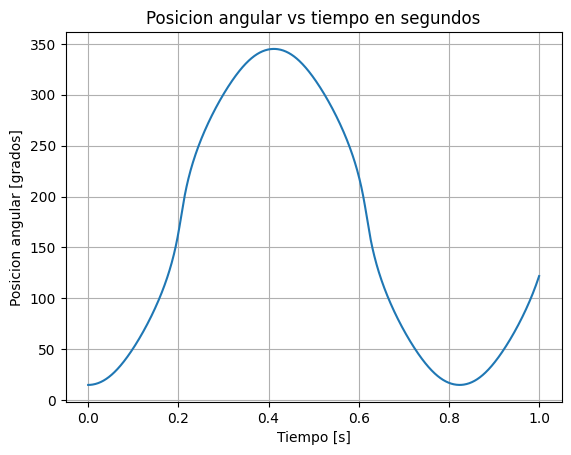

In [424]:
plt.plot(t, angulos)
plt.xlabel("Tiempo [s]")
plt.ylabel("Posicion angular [grados]")
plt.title("Posicion angular vs tiempo en segundos")
plt.grid()
plt.show();

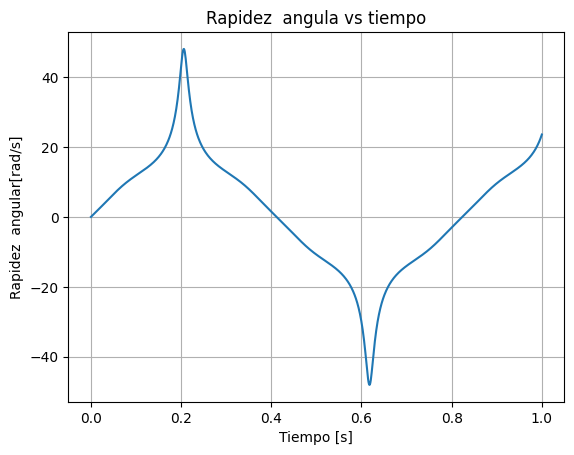

In [425]:
plt.plot(t, rapideces)
plt.xlabel("Tiempo [s]")
plt.ylabel("Rapidez  angular[rad/s]")
plt.title("Rapidez  angular vs tiempo")
plt.grid()
plt.show();

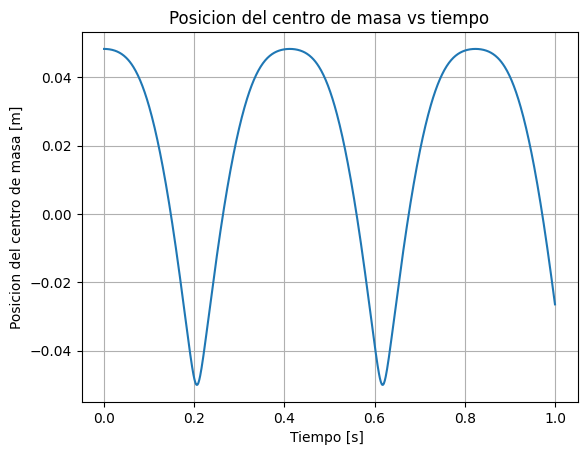

In [426]:
plt.plot(t, y)
plt.xlabel("Tiempo [s] ")
plt.ylabel("Posicion del centro de masa [m]")
plt.title("Posicion del centro de masa vs tiempo")
plt.grid()
plt.show();

**3) Con el programa construido en los puntos 1 y 2, analice el efecto del paso del tiempo en la posición angular, la posición del centro de masa y la rapidez angular. Aproximadamente, ¿a partir de qué tiempo la solución puede ser considerada válida?**

Se observa un comportamiento periodico en la posicion angular, posicion del centro de masa y rapidez angular cuando transcurre el tiempo, esto no es valido en la vida real, entonces se debe buscar un tiempo en el cual  la solución se considere válida , en este caso cuando el tiempo en el que el  angulo $\theta $ sea igual a $\frac{π}{2}$ o cuando el valor de y sea igual a cero.

In [427]:
# se corta la grafica en el eje x  hasta un valor de t =0.2
t_menores = t[t<=0.2]

# se cortan la grafica en el eje y hasta un valor de posicion angular correspondiente a t=0.2
angulos_2 = angulos[0:len(t_menores)]


In [428]:
### se eliminan los valores maoyores a 90

angulos90 = angulos_2[angulos_2 <= 90]

# determino cual es el angulo mas cercano a 90
angulo_cercano90 = angulos90[-1]

## el indice de ese angulo cercano
indice_cercano = np.where(angulos == angulo_cercano90)
indice_cercano = indice_cercano[0][0]

 # con este indice hallo en t el tiempo correspondiente al momento en que el lapiz alcanca
 # los 90 °
print("La solucion se considera valida antes de los ", round(t[indice_cercano],2), "segundos")

La solucion se considera valida antes de los  0.15 segundos


4. Con el paso del tiempo calibrado, construya cuatro curvas en una misma figura de la posición angular como función del tiempo, para ángulos iniciales de caída de: $\theta_0 = \pi/12$, $\theta_0 = \pi/6$, $\theta_0 = \pi/4$, $\theta_0 = \pi/3$ y $\omega_0 = 0$.

In [429]:
### creo una matriz cuyas filas son vectores tipo y0 = (theta_0, w_0)
matriz =np.array([[np.pi/12,w_0],
                  [np.pi/6,w_0],
                  [np.pi/4,w_0],
                  [np.pi/3,w_0],])

In [430]:
## evaluo cada fila de la matriz en en el odeint, pongo los tiempos ya calibrados
angulos_12=odeint(funcion, matriz[0,:], t, args=(g,L))[:,0] * (180/np.pi)
angulos_6=odeint(funcion, matriz[1,:], t, args=(g,L))[:,0]* (180/np.pi)
angulos_4=odeint(funcion, matriz[2,:], t, args=(g,L))[:,0]* (180/np.pi)
angulos_3=odeint(funcion, matriz[3,:], t, args=(g,L))[:,0]* (180/np.pi)

In [431]:
# se cortan la grafica en el eje y hasta un valor de posicion angular correspondiente a t=0.2
angulos_12 = angulos_12[angulos_12<=90]
angulos_6 = angulos_6[angulos_6<=90]
angulos_4 = angulos_4[angulos_4<=90]
angulos_3 = angulos_3[angulos_3<=90]

In [432]:
angulos_12i = np.zeros(len(angulos_12))
angulos_6i = np.zeros(len(angulos_6))
angulos_4i = np.zeros(len(angulos_4))
angulos_3i = np.zeros(len(angulos_3))
for i,j in enumerate(angulos_12):
  if j>89:
    break
  else:
    angulos_12i[i]=j



In [433]:
for i,j in enumerate(angulos_6):
  if j>89:
    break
  else:
    angulos_6i[i]=j

for i,j in enumerate(angulos_4):
  if j>89:
    break
  else:
    angulos_4i[i]=j

for i,j in enumerate(angulos_3):
  if j>89:
    break
  else:
    angulos_3i[i]=j




In [434]:
angulos_12i=angulos_12i[angulos_12i!=0]
angulos_6i=angulos_6i[angulos_6i!=0]
angulos_4i=angulos_4i[angulos_4i!=0]
angulos_3i=angulos_3i[angulos_3i!=0]

In [435]:
tc12= np.where(angulos_12==angulos_12i[-1])[0][0]
tc6= np.where(angulos_6==angulos_6i[-1])[0][0]
tc4= np.where(angulos_4==angulos_4i[-1])[0][0]
tc3= np.where(angulos_3==angulos_3i[-1])[0][0]

In [436]:
t12 = np.linspace(0,t[tc12],len(angulos_12i))
t6 = np.linspace(0,t[tc6],len(angulos_6i))
t4 = np.linspace(0,t[tc4],len(angulos_4i))
t3= np.linspace(0,t[tc3],len(angulos_3i))

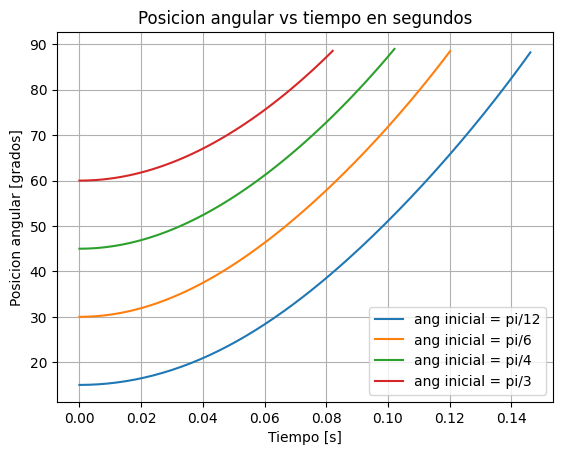

In [437]:
plt.plot(t12,angulos_12i, label="ang inicial = pi/12")
plt.plot(t6,angulos_6i,label="ang inicial = pi/6")
plt.plot(t4,angulos_4i,label="ang inicial = pi/4")
plt.plot(t3,angulos_3i, label="ang inicial = pi/3")
plt.xlabel("Tiempo [s]")
plt.ylabel("Posicion angular [grados]")
plt.title("Posicion angular vs tiempo en segundos")
plt.grid()
plt.legend()
plt.show();


**5. Con los resultados obtenidos, realice una interpolación para cada figura del inciso anterior y encuentre el tiempo de caída, empleando algún método conocido de raíces.**


Se usa CubicSpline

In [438]:
cs12 = CubicSpline(t12,angulos_12i)
ang12 = cs12(t12)
cs6 = CubicSpline(t6,angulos_6i)
ang6 = cs6(t6)
cs4 = CubicSpline(t4,angulos_4i)
ang4 = cs4(t4)
cs3 = CubicSpline(t3,angulos_3i)
ang3 = cs3(t3)


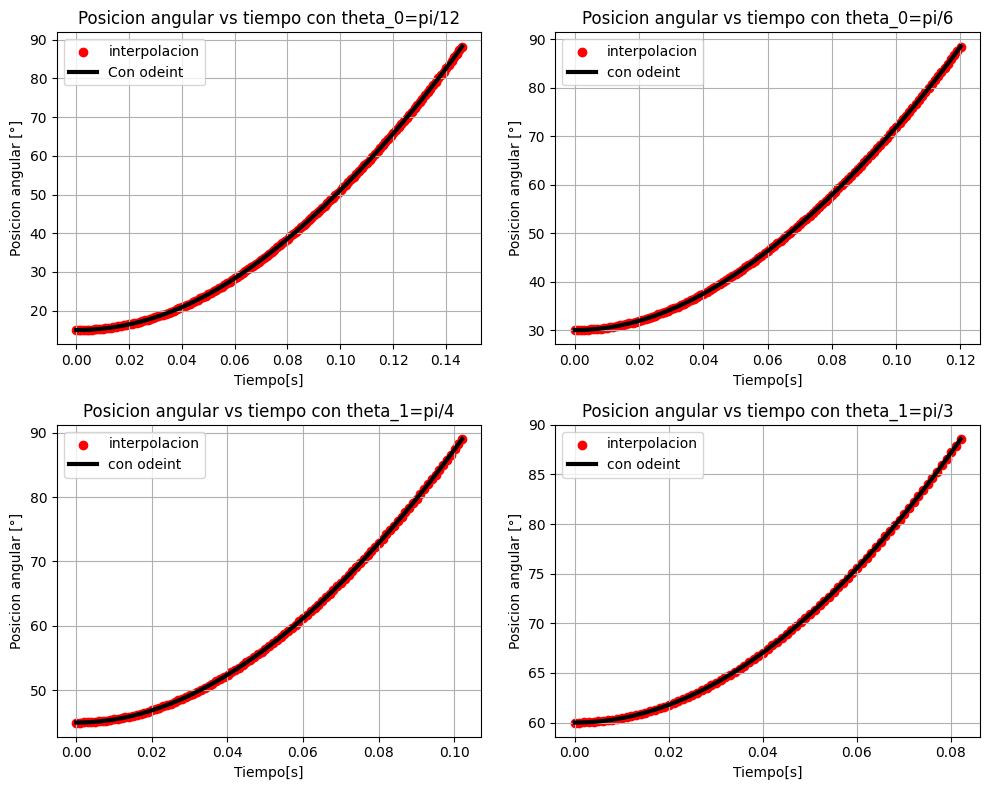

In [439]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].scatter(t12,ang12,color="red",label="interpolacion")
axs[0, 0].plot(t12, angulos_12i,linewidth=3, color="black", label="Con odeint")
axs[0, 0].set_title("Posicion angular vs tiempo con theta_0=pi/12")
axs[0, 0].set_ylabel("Posicion angular [°]")
axs[0, 0].set_xlabel("Tiempo[s]")
axs[0, 0].grid(True)
axs[0, 0].legend()
axs[0, 1].scatter(t6,ang6,color="red",label="interpolacion")
axs[0, 1].plot(t6, angulos_6i,linewidth=3, color="black", label="con odeint")
axs[0, 1].set_title("Posicion angular vs tiempo con theta_0=pi/6")
axs[0, 1].set_ylabel("Posicion angular [°]")
axs[0, 1].set_xlabel("Tiempo[s]")
axs[0, 1].grid(True)
axs[0, 1].legend()


axs[1, 0].scatter(t4,ang4,color="red",label="interpolacion")
axs[1, 0].plot(t4, angulos_4i,linewidth=3, color="black", label="con odeint")
axs[1, 0].set_title("Posicion angular vs tiempo con theta_1=pi/4")
axs[1, 0].set_ylabel("Posicion angular [°]")
axs[1, 0].set_xlabel("Tiempo[s]")
axs[1, 0].grid(True)
axs[1, 0].legend()

axs[1, 1].scatter(t3,ang3,color="red",label="interpolacion")
axs[1, 1].plot(t3, angulos_3i,linewidth=3, color="black", label="con odeint")
axs[1, 1].set_title("Posicion angular vs tiempo con theta_1=pi/3")
axs[1, 1].set_ylabel("Posicion angular [°]")
axs[1, 1].set_xlabel("Tiempo[s]")
axs[1, 1].grid(True)
axs[1, 1].legend()





plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [440]:
## ahora los tiempos de caida del lapiz para diferentes angulos iniciales
f12 = lambda x : cs12(x) - 90
f6 = lambda x : cs6(x) - 90
f4 = lambda x : cs4(x) - 90
f3 = lambda x : cs3(x) - 90

tiempo_caida_12= optimize.newton(f12,0.2)
tiempo_caida_6= optimize.newton(f6,0.2)
tiempo_caida_4= optimize.newton(f4,0.2)
tiempo_caida_3= optimize.newton(f3,0.2)


print("El tiempo de caida para el angulo inicial de pi/12 radianes es ", round(tiempo_caida_12,3), "segundos")
print("El tiempo de caida para el angulo inicial de pi/6 radianes es ", round(tiempo_caida_6,3),"segundos")
print("El tiempo de caida para el angulo inicial de pi/4 radianes es ", round(tiempo_caida_4,3),"segundos")
print("El tiempo de caida para el angulo inicial de pi/3 radianes es ", round(tiempo_caida_3,3),"segundos")

El tiempo de caida para el angulo inicial de pi/12 radianes es  0.148 segundos
El tiempo de caida para el angulo inicial de pi/6 radianes es  0.122 segundos
El tiempo de caida para el angulo inicial de pi/4 radianes es  0.103 segundos
El tiempo de caida para el angulo inicial de pi/3 radianes es  0.084 segundos



6. El Tiempo que tarda el lápiz en caer $T$, puede ser deducido de la ecuación de conservación de la energía, el cual viene dado por la siguiente integral:  


\begin{equation}
T = \frac{1}{2}\sqrt{\frac{l}{g}} \int_{\theta_0}^{\pi/2} \sqrt{\frac{1/3 + \sin^2 \theta}{\cos \theta_0 - \cos \theta}} \, \mathrm{d}\theta
\end{equation}

Valide sus soluciones del tiempo de caída utilizando la siguiente ecuación.

In [441]:
primer_termino = 0.5 * (np.sqrt(L/g))

In [442]:
theta12 = np.pi/12
f12 = lambda theta: (((1/3) + (np.sin(theta))**2) /  (np.cos(theta12) - np.cos(theta )))**0.5

theta6 = np.pi/6
f6 = lambda theta: (((1/3) + (np.sin(theta))**2) /  (np.cos(theta6) - np.cos(theta )))**0.5


theta4 = np.pi/4
f4 = lambda theta: (((1/3) + (np.sin(theta))**2) /  (np.cos(theta4) - np.cos(theta )))**0.5

theta3 = np.pi/3
f3 = lambda theta: (((1/3) + (np.sin(theta))**2) /  (np.cos(theta3) - np.cos(theta )))**0.5

In [443]:
## integracion con quad
I12 = quad(f12, theta12, np.pi/2)[0]
I6 = quad(f6, theta6, np.pi/2)[0]
I4 = quad(f4, theta4, np.pi/2)[0]
I3 = quad(f3, theta3, np.pi/2)[0]

In [444]:
tiempo12 = primer_termino * I12
tiempo6 = primer_termino * I6
tiempo4 = primer_termino * I4
tiempo3 = primer_termino * I3

In [445]:
print("El tiempo de caida para el angulo inicial de pi/12 radianes es ", round(tiempo12,3), "segundos")
print("El tiempo de caida para el angulo inicial de pi/6 radianes es ", round(tiempo6,3),"segundos")
print("El tiempo de caida para el angulo inicial de pi/4 radianes es ", round(tiempo4,3),"segundos")
print("El tiempo de caida para el angulo inicial de pi/3 radianes es ", round(tiempo3,3),"segundos")

El tiempo de caida para el angulo inicial de pi/12 radianes es  0.148 segundos
El tiempo de caida para el angulo inicial de pi/6 radianes es  0.122 segundos
El tiempo de caida para el angulo inicial de pi/4 radianes es  0.103 segundos
El tiempo de caida para el angulo inicial de pi/3 radianes es  0.084 segundos


In [446]:
print("la diferencia entre los tiempos de caida para angulo inicial pi/12 es ", round(tiempo12,6)-round(tiempo_caida_12,6), "se valida")
print("la diferencia entre los tiempos de caida para angulo inicial pi/6 es ", round(tiempo6,6)-round(tiempo_caida_6,6),"se valida")
print("la diferencia entre los tiempos de caida para angulo inicial pi/4 es ", round(tiempo4,6)-round(tiempo_caida_4,6), "se valida")
print("la diferencia entre los tiempos de caida para angulo inicial pi/3 es ", round(tiempo3,6)-round(tiempo_caida_3,6), "se valida")

la diferencia entre los tiempos de caida para angulo inicial pi/12 es  0.0 se valida
la diferencia entre los tiempos de caida para angulo inicial pi/6 es  0.0 se valida
la diferencia entre los tiempos de caida para angulo inicial pi/4 es  0.0 se valida
la diferencia entre los tiempos de caida para angulo inicial pi/3 es  0.0 se valida


7) Finalmente, realice un gráfico de  T  como función de  θ0 . ¿Qué puede concluir?

In [447]:
T = np.array([tiempo3, tiempo4, tiempo6, tiempo12])
thetas_0s = np.array([np.pi/3, np.pi/4, np.pi/6, np.pi/12]) * 180/np.pi

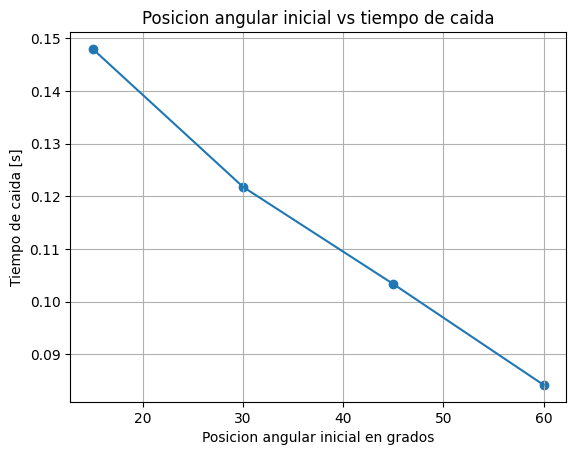

In [449]:
plt.plot(thetas_0s,T)
plt.scatter(thetas_0s,T)
plt.xlabel("Posicion angular inicial en grados")
plt.ylabel("Tiempo de caida [s]")
plt.title("Posicion angular inicial vs tiempo de caida")
plt.grid()
plt.show();

Si se aumenta el angulo con respecto a la normal, el lapiz tiene un menor tiempo de caida o viceverza

FIN

##profe por favor no se olvide de revisar la nota de mi primer parcial, parece que no califico la segundo parte,gracias!###